In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools as it
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
#for dirname, _, filenames in os.walk('data.csv'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
my_data = pd.read_csv('data.csv')
my_data.head(10)



,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [2]:
labels=my_data.Label
labels.head()


0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [3]:
Labels_count=my_data.Label.value_counts()
Labels_count

Label
0    2137
1    1872
Name: count, dtype: int64

C:\Users\THANUJA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\THANUJA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\THANUJA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


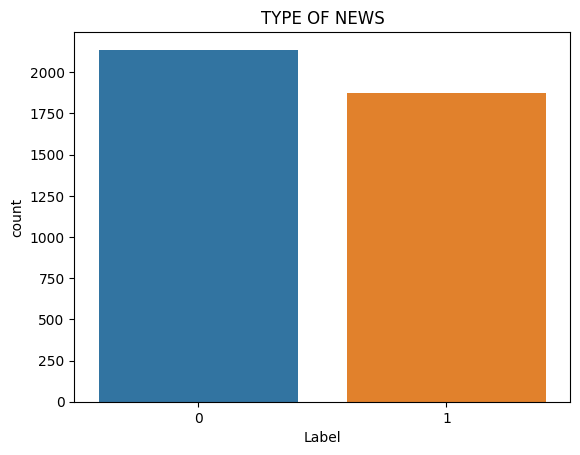

In [4]:
sns.countplot(x ='Label', data = my_data)
plt.title('TYPE OF NEWS');

In [5]:
my_data['New_Label'] = my_data['Label'].map(str)
my_data['New_Label']

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: New_Label, Length: 4009, dtype: object

In [6]:
my_data.head()

,URLs,Headline,Body,Label,New_Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,1


In [7]:
my_data['Body'] = my_data['Body'].map(str)

In [8]:
my_data['Body'] = my_data['Body'].apply(str.lower)
#my_data['Body']


In [9]:
x_train,x_test,y_train,y_test=train_test_split(my_data['Body'], labels, test_size=0.2, random_state=7)
x_train
#len(y_test)


356     (cnn) rapper eminem unleashed a blistering fou...
2699    the bills that will make it easier for people ...
1151    (cnn) — inhale the pine-scented air, plunge in...
3614    no getting around it, the war is coming! trump...
2011    an exhibit about the vietnam war is seen at th...
                              ...                        
1603    swiss authorities said wednesday that a german...
2550    warning something big is about to happen in am...
537     harrison ford, ryan gosling, ana de armas and ...
1220    tunis/rome (reuters) - at least eight people d...
175     hangover win\n% of readers think this story is...
Name: Body, Length: 3207, dtype: object

In [10]:
x_test



414     the nationals, on the other hand, claimed the ...
378     the durham bulls in 2017 — part 2 — the pitche...
658     sen. collins says ‘no’ to graham-cassidy healt...
590     what is the perfect golf swing?\n(before it's ...
1602    mexico city (reuters) - gmexico transportes, t...
                              ...                        
3958    cairo/beirut (reuters) - a ceasefire deal for ...
3123    by massprivatei\neditor’s note: this is the mi...
2682    no getting around it, the war is coming! trump...
3875    by jake anderson\nsomewhere in the world, a do...
2230    image copyright reuters image caption oppositi...
Name: Body, Length: 802, dtype: object

In [11]:
y_train

356     1
2699    0
1151    1
3614    0
2011    1
       ..
1603    1
2550    0
537     1
1220    1
175     0
Name: Label, Length: 3207, dtype: int64

In [12]:
y_test

414     1
378     0
658     0
590     0
1602    1
       ..
3958    1
3123    0
2682    0
3875    0
2230    1
Name: Label, Length: 802, dtype: int64

In [13]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)
#print(tfidf_test)

In [14]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
print(tfidf_test)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

  (0, 42361)	0.07020872521456824
  (0, 42156)	0.0323448273257744
  (0, 42147)	0.05188631505720147
  (0, 42078)	0.022134879290770876
  (0, 42071)	0.03946887076880965
  (0, 41807)	0.022528799119491325
  (0, 41744)	0.028029376968486532
  (0, 41629)	0.0422198297547311
  (0, 41312)	0.029697761069842912
  (0, 41168)	0.049752232604175654
  (0, 41152)	0.03698334731404364
  (0, 41145)	0.023605700919717348
  (0, 41081)	0.0590438723609473
  (0, 40926)	0.043020854561297006
  (0, 40579)	0.029179849110538524
  (0, 40464)	0.03565196982446532
  (0, 40408)	0.07230769327764473
  (0, 40054)	0.0349617073481553
  (0, 39277)	0.03963454007045996
  (0, 39108)	0.02987693520535913
  (0, 39067)	0.037094011622276025
  (0, 38520)	0.027840192447732996
  (0, 38328)	0.04961388263616808
  (0, 38317)	0.0382932258803986
  (0, 38191)	0.04104814822893715
  :	:
  (801, 8818)	0.07689375496072573
  (801, 8744)	0.05179364885622518
  (801, 8702)	0.17317185247719225
  (801, 8384)	0.0646005993471563
  (801, 8152)	0.0802385042412

In [15]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[422,  12],
       [  6, 362]], dtype=int64)

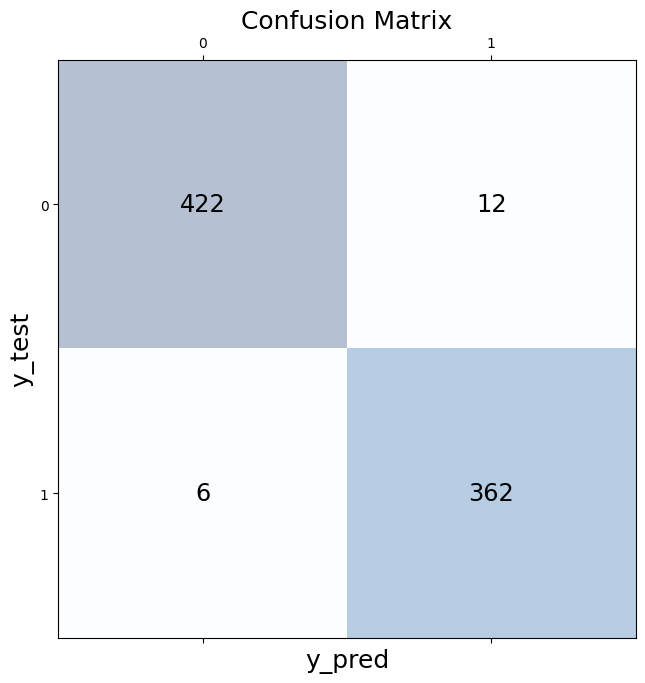

In [16]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('y_pred', fontsize=18)
plt.ylabel('y_test', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [17]:
import joblib
joblib.dump(pac, 'fakenews.pkl')


['fakenews.pkl']

In [32]:
loaded_model = joblib.load('fakenews.pkl') 


In [33]:
my_data['Body'] = my_data['Body'].map(str)

In [34]:
my_data['Body'] = my_data['Body'].apply(str.lower)